# PROJET 7

# IMPLEMENTEZ UN MODELE DE SCORING





## NOTEBOOK 4 - FETAURE IMPORTANCE GLOBALE & LOCALE

In [1]:
#pip install wheel

In [2]:
#pip install daal==2021.4.0

In [3]:
#pip install numpy==1.20

In [4]:
#pip install xplotter

In [5]:
#pip install shap

In [6]:
#pip install numba==0.53.0

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter

from lightgbm import LGBMClassifier

In [8]:
import shap

In [9]:
X_train = pd.read_csv("data_work/X_train.csv", sep ='\t')
X_test = pd.read_csv("data_work/X_test.csv", sep ='\t')
y_train = pd.read_csv("data_work/y_train.csv", sep ='\t')
y_test = pd.read_csv("data_work/y_test.csv", sep ='\t')
data_train_t = pd.read_csv("data_work/data_train_t.csv", sep ='\t')

In [10]:
data_train_t.head()

Unnamed: 0  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      127044                 0.0           0.0          0.001127    0.165146   
1      281143                 0.0           1.0          0.000819    0.124854   
2      199799                 0.0           1.0          0.001704    0.224045   
3      306749                 1.0           0.0          0.001012    0.033708   
4      301347                 0.0           0.0          0.000742    0.170984   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     0.255283         0.159371                    0.447139    0.408865   
1     0.092787         0.102132                    0.094955    0.372087   
2     0.101650         0.158249                    0.309626    0.802023   
3     0.028800         0.034792                    0.088243    0.320440   
4     0.139523         0.147026                    0.636177    0.689062   

   DAYS_EMPLOYED  ...  NAME_EDUCATION_TYPE_Secondary / secondary special  \
0       0.958633  ...                                                0.0   
1       0.959113  ...                                                1.0   
2       0.956736  ...                                                1.0   
3       0.959233  ...                                                1.0   
4       0.000000  ...                                                1.0   

   NAME_FAMILY_STATUS_Married  OCCUPATION_TYPE_Accountants  \
0                         1.0                          0.0   
1                         1.0                          0.0   
2                         1.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   OCCUPATION_TYPE_Cleaning staff  OCCUPATION_TYPE_Core staff  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

   OCCUPATION_TYPE_Drivers  ORGANIZATION_TYPE_Business Entity Type 3  \
0                      0.0                                       0.0   
1                      0.0                                       1.0   
2                      0.0                                       0.0   
3                      0.0                                       0.0   
4                      0.0                                       0.0   

   ORGANIZATION_TYPE_Construction  ORGANIZATION_TYPE_Military  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

   ORGANIZATION_TYPE_Self-employed  
0                              0.0  
1                              0.0  
2                              1.0  
3                              0.0  
4                              0.0  

[5 rows x 113 columns]

In [11]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
data_train_t = data_train_t.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [12]:
y_train=y_train['TARGET']
y_test=y_test['TARGET']

In [13]:
import re
X_train = X_train.drop('Unnamed0',axis=1)
X_test = X_test.drop('Unnamed0',axis=1)
data_train_t = data_train_t.drop('Unnamed0',axis=1)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((215257, 112), (92254, 112), (215257,), (92254,))

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,data_train_t.shape

((215257, 112), (92254, 112), (215257,), (92254,), (307511, 112))

In [16]:
clf = LGBMClassifier(learning_rate= 0.01, max_depth= 4, n_estimators= 200)
model_LGBM = clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.127846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19120
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [43]:
# Sauvegarde du modèle
import pickle

pickle.dump(model_LGBM, open('model_LGBM.pkl', 'wb'))
pickle.dump(model_LGBM, open('PROJET7_API/model_LGBM.pkl', 'wb'))

### PARTIE 1 - FEATURE IMPORTANCE GLOBAL

In [18]:
# Récupération des shap_values par le paramètre `pred_contrib` de la fonction predict de LGBM
shap_values_lgbm =  model_LGBM.predict(data_train_t, pred_contrib=True)


In [19]:
# explain the model

explainer = shap.TreeExplainer(model_LGBM)
shap_values_all = explainer(data_train_t)

In [20]:
print(f"Valeur de Référence moyenne : {shap_values_all.base_values[0]}")

Valeur de Référence moyenne : [ 2.57337561 -2.57337561]


### Diagramme des variables (Moyenne valeurs absolues)

In [21]:
shap_values = explainer.shap_values(data_train_t)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [22]:
shap_values_df = pd.DataFrame(data=shap_values[1], columns=data_train_t.columns)
shap_values_df.shape

(307511, 112)

In [23]:
shap_values_df.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  \
0            0.001437      0.002198               0.0    0.002857   
1            0.000920     -0.001815               0.0    0.002173   
2            0.000306     -0.004586               0.0    0.002925   
3           -0.004139      0.004074               0.0   -0.005559   
4            0.001458      0.002753               0.0    0.002689   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     0.004221        -0.006244                   -0.000096    0.020937   
1     0.005230         0.006300                    0.000044    0.021571   
2     0.004967        -0.001020                    0.000044   -0.063615   
3    -0.019891         0.003449                    0.000045    0.049899   
4     0.005602        -0.003151                   -0.000096   -0.032094   

   DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
0      -0.007143           0.000037  ...   
1      -0.003441          -0.000019  ...   
2       0.008513          -0.000003  ...   
3      -0.013824          -0.000005  ...   
4       0.004618          -0.000055  ...   

   NAME_EDUCATION_TYPE_Secondarysecondaryspecial  NAME_FAMILY_STATUS_Married  \
0                                      -0.014007                   -0.000162   
1                                       0.002441                   -0.000171   
2                                       0.003033                   -0.001777   
3                                       0.004752                    0.000941   
4                                       0.004665                    0.000625   

   OCCUPATION_TYPE_Accountants  OCCUPATION_TYPE_Cleaningstaff  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          0.0                            0.0   
4                          0.0                            0.0   

   OCCUPATION_TYPE_Corestaff  OCCUPATION_TYPE_Drivers  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   

   ORGANIZATION_TYPE_BusinessEntityType3  ORGANIZATION_TYPE_Construction  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   

   ORGANIZATION_TYPE_Military  ORGANIZATION_TYPE_Selfemployed  
0                         0.0                       -0.000003  
1                         0.0                       -0.000003  
2                         0.0                        0.000286  
3                         0.0                       -0.000003  
4                         0.0                       -0.000006  

[5 rows x 112 columns]

In [24]:
print(f"Moyenne des valeurs absolues des valeurs de Shap :\n{shap_values_df.abs().mean().sort_values(ascending=False)}")

Moyenne des valeurs absolues des valeurs de Shap :
EXT_SOURCE_3                                          0.280208
EXT_SOURCE_2                                          0.267077
EXT_SOURCE_1                                          0.085618
DAYS_BIRTH                                            0.042027
CODE_GENDER_F                                         0.035365
                                                        ...   
OBS_30_CNT_SOCIAL_CIRCLE                              0.000000
NONLIVINGAREA_MEDI                                    0.000000
PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM    0.000000
PREV_APPL_MEAN_CARD_MEAN_SK_DPD                       0.000000
NONLIVINGAREA_AVG                                     0.000000
Length: 112, dtype: float64


In [25]:
print(f"Moyenne des Moyenne des valeurs absolues des valeurs de Shap : {shap_values_df.abs().mean().mean():.2f}")

Moyenne des Moyenne des valeurs absolues des valeurs de Shap : 0.01


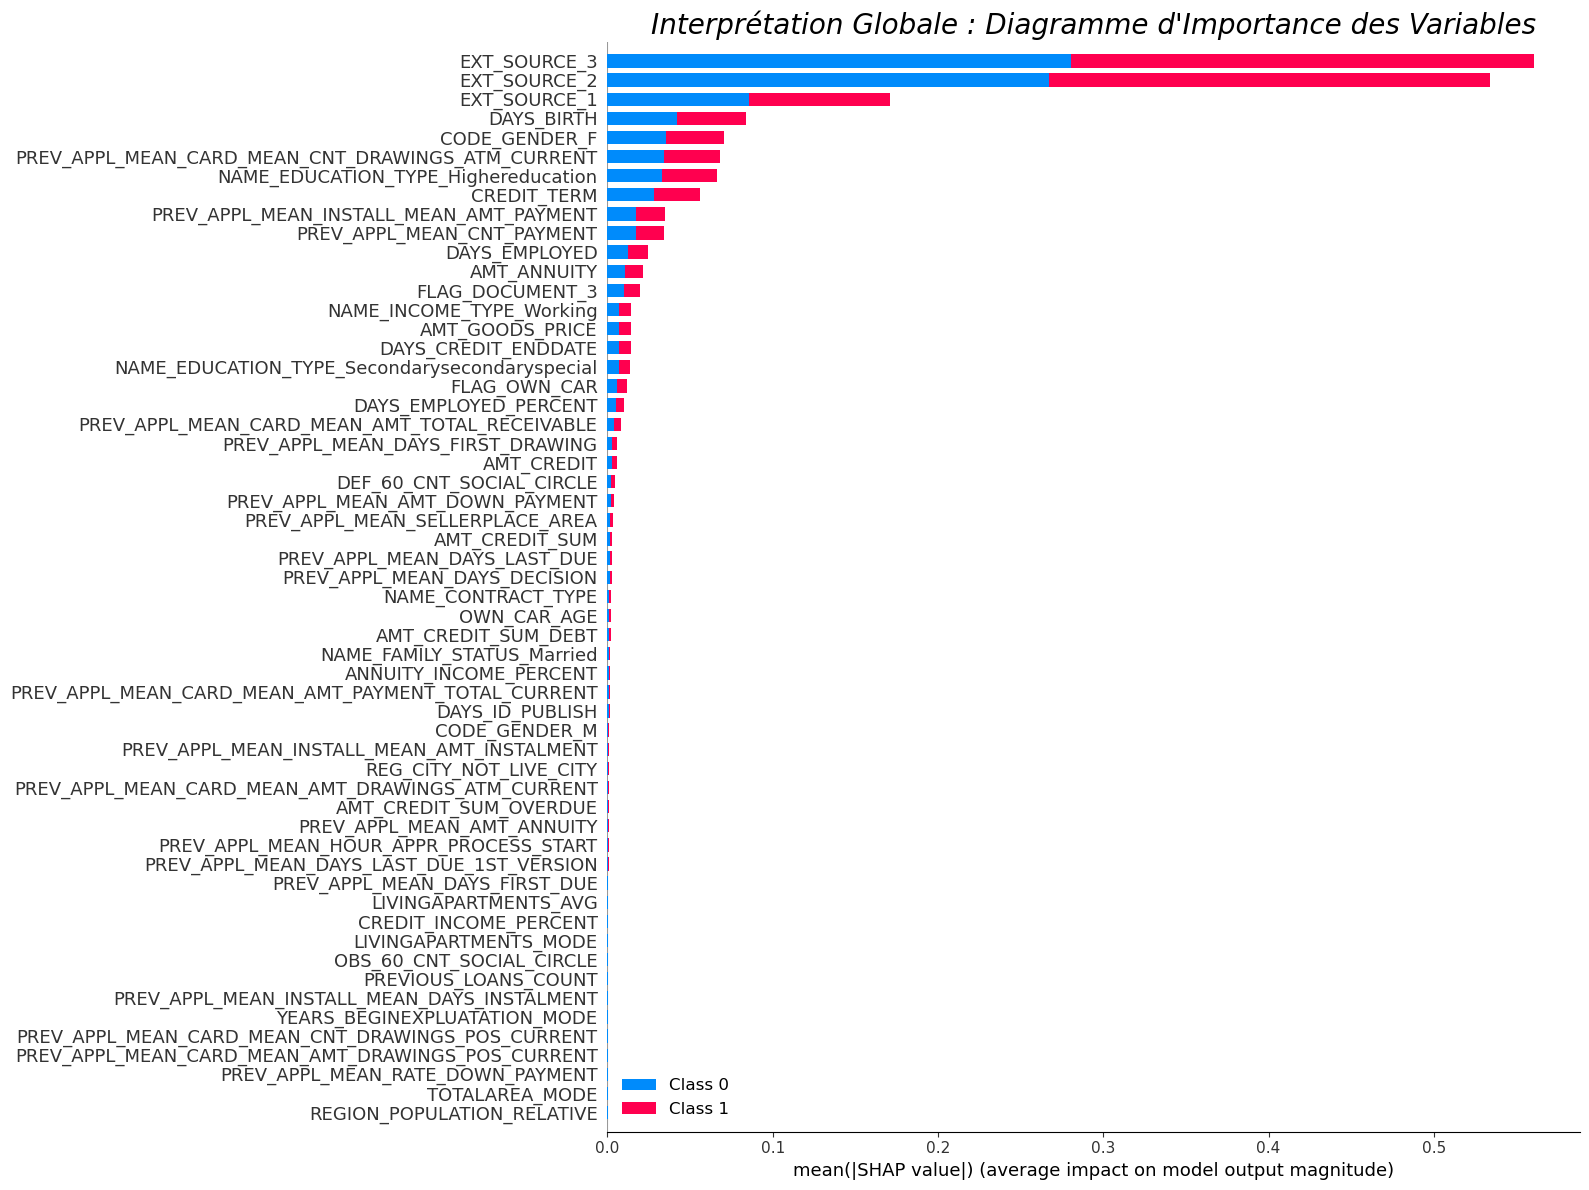

In [26]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=data_train_t.columns,
                  plot_size=(16, 12),
                  plot_type="bar",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

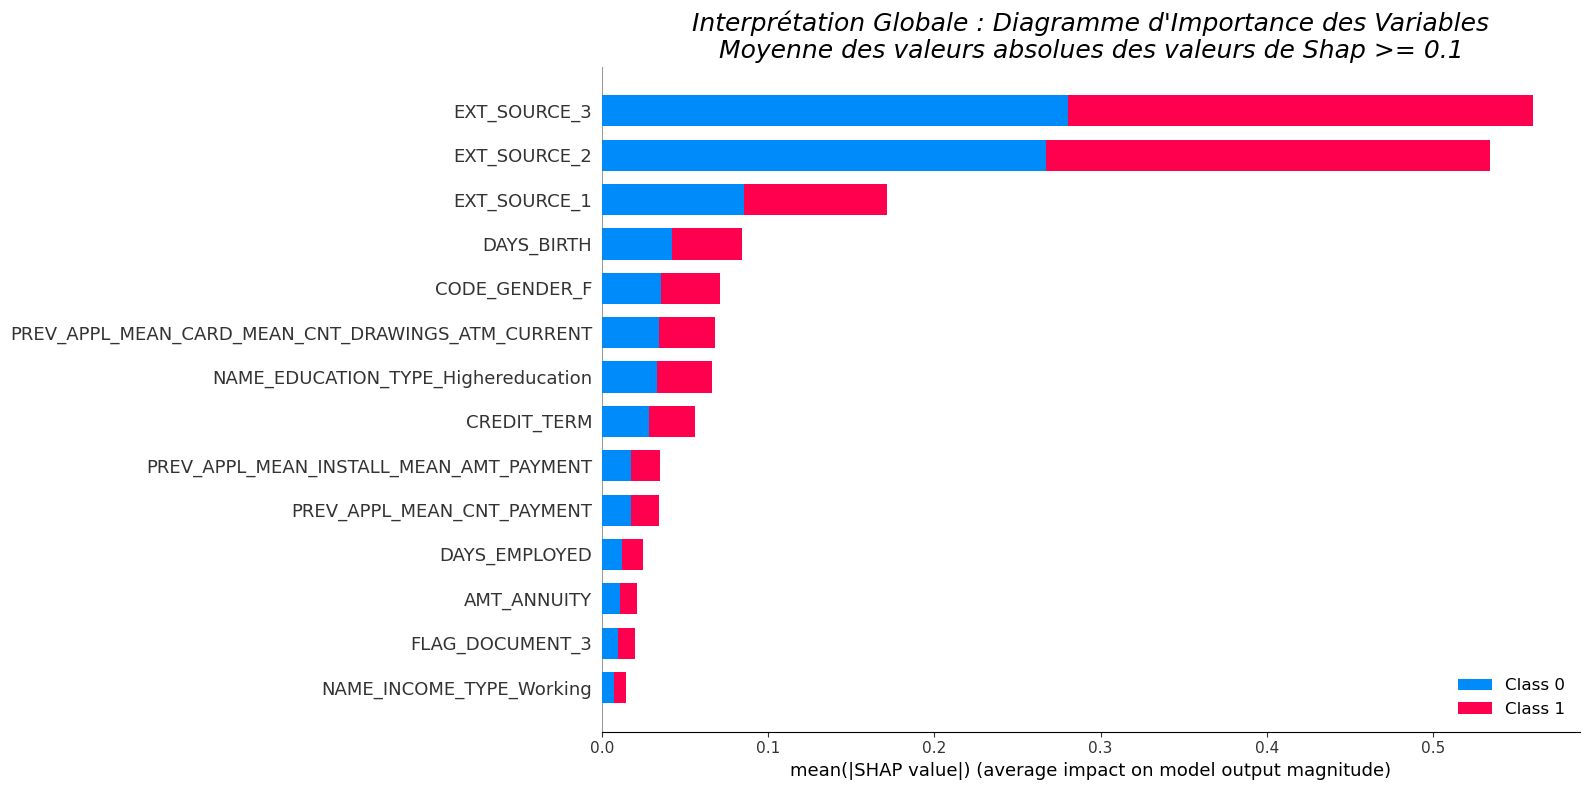

In [27]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=data_train_t.columns,
                  plot_size=(16, 8),
                  plot_type="bar",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Diagramme des variables
Les valeurs de Shap sont représentées pour chaque variable dans leur ordre d’importance, chaque point représente une valeur de Shap (pour un client), les points rouges représentent des valeurs élevées de la variable et les points bleus des valeurs basses de la variable.

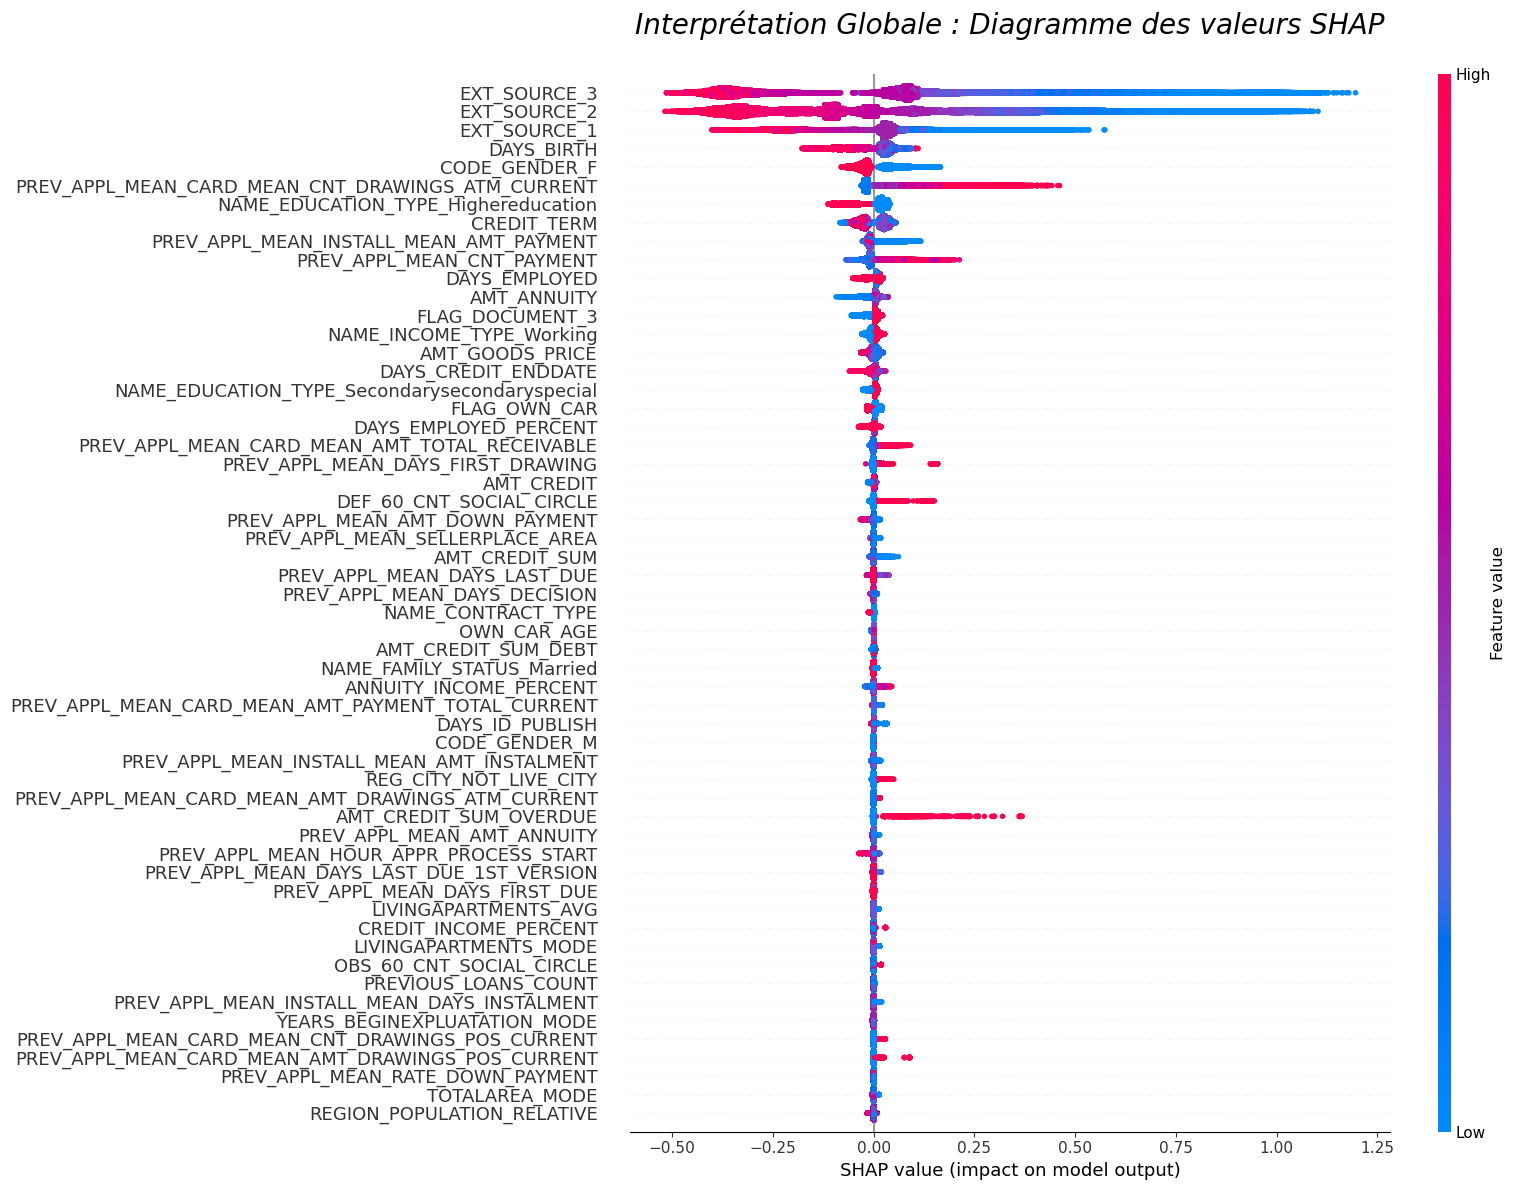

In [28]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=data_train_t,
                  feature_names=data_train_t.columns,
                  plot_size=(16, 12),
                  plot_type="dot",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", 
          fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

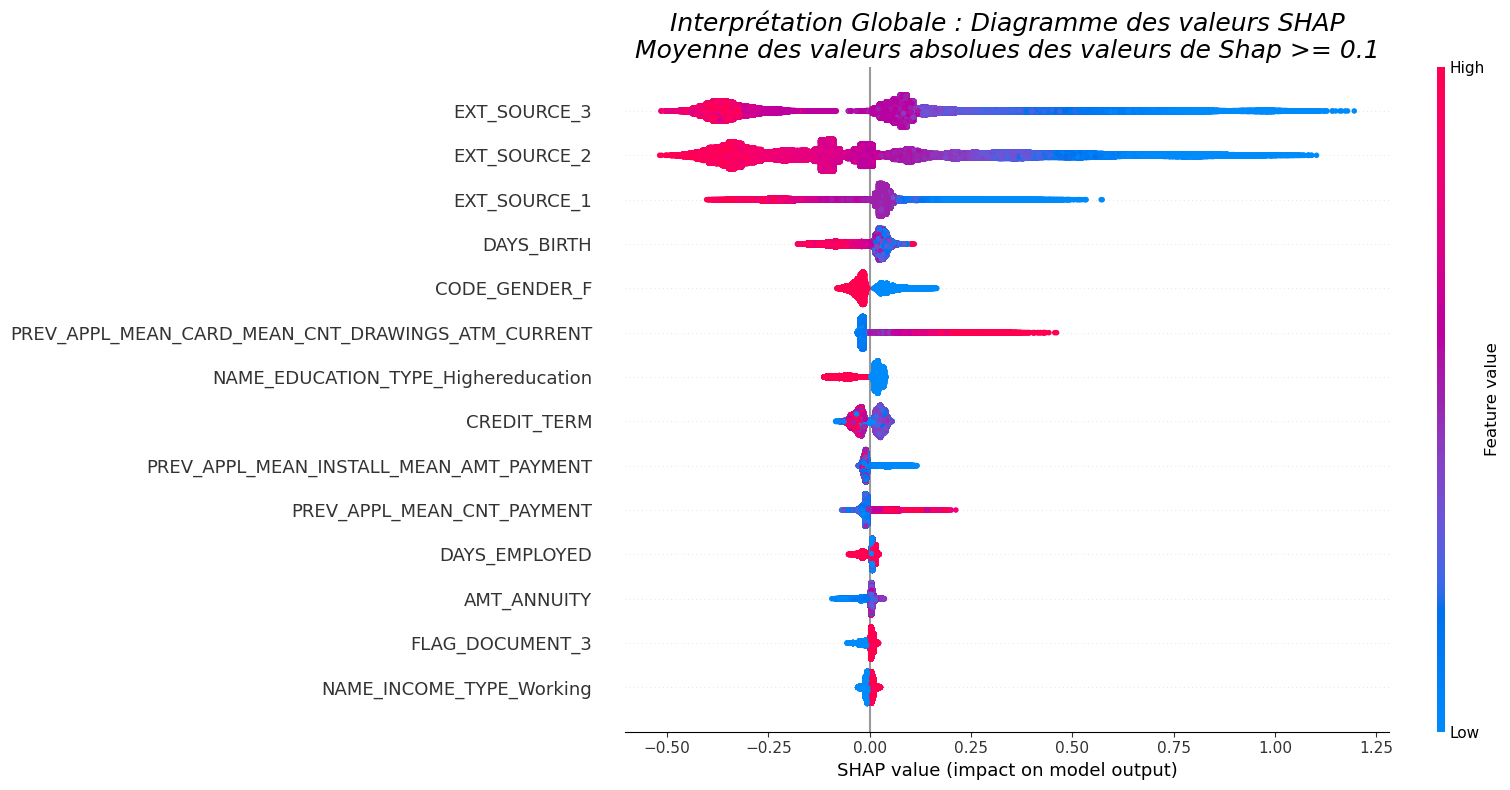

In [29]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=data_train_t,
                  feature_names=data_train_t.columns,
                  plot_size=(16, 8),
                  plot_type="dot",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Graphiques des prédictions - 100 individus

In [30]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], data_train_t.iloc[:100,:])

### Graphiques de dépendance

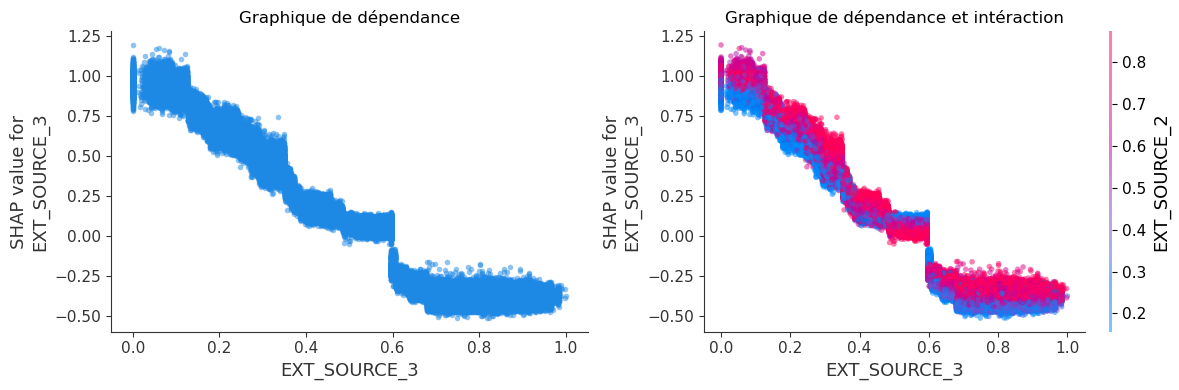

In [31]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

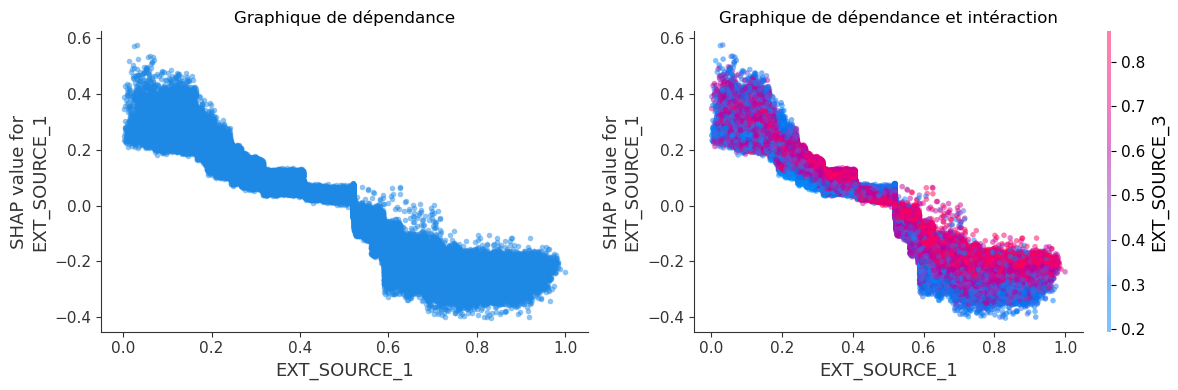

In [32]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

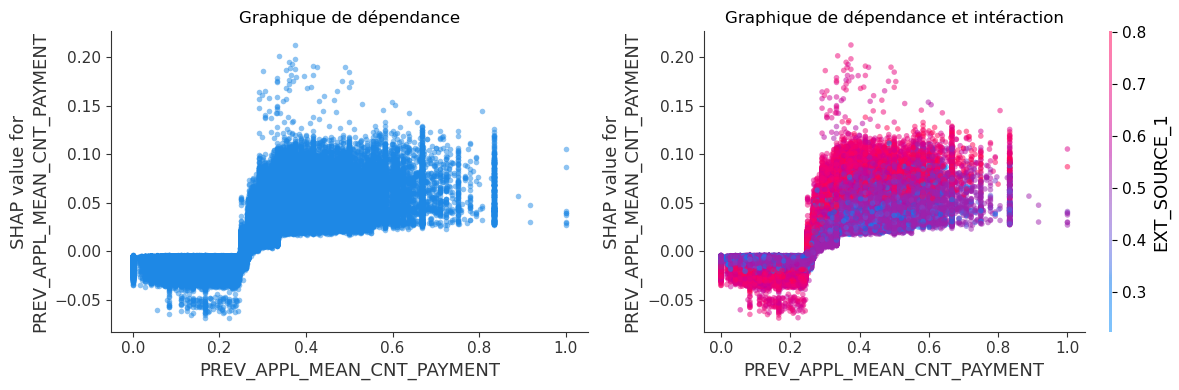

In [33]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

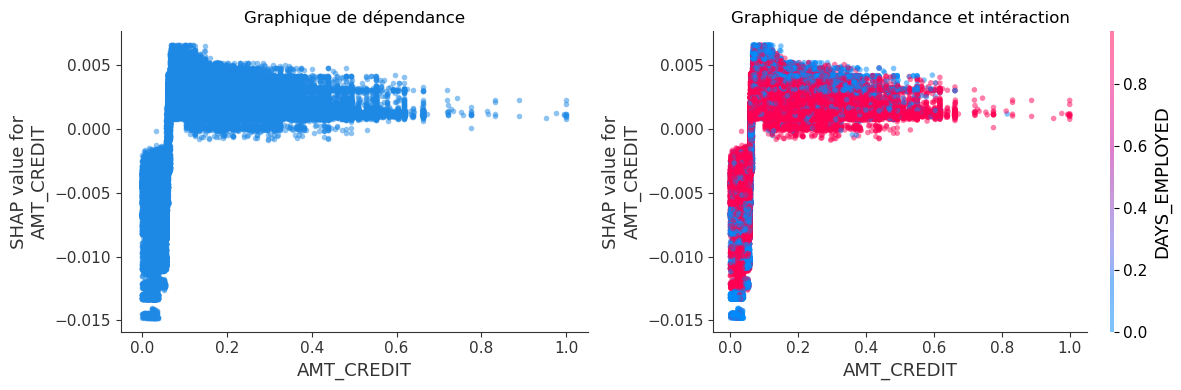

In [34]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("AMT_CREDIT", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("AMT_CREDIT", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

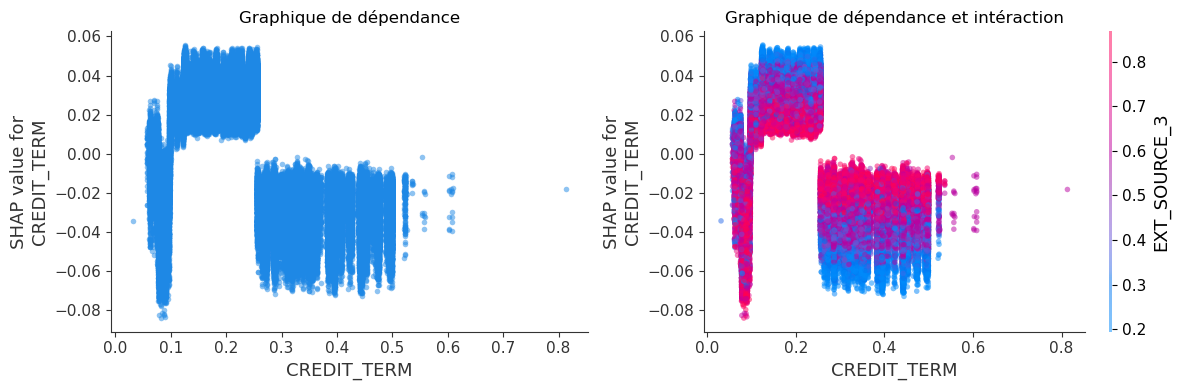

In [35]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("CREDIT_TERM", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("CREDIT_TERM", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

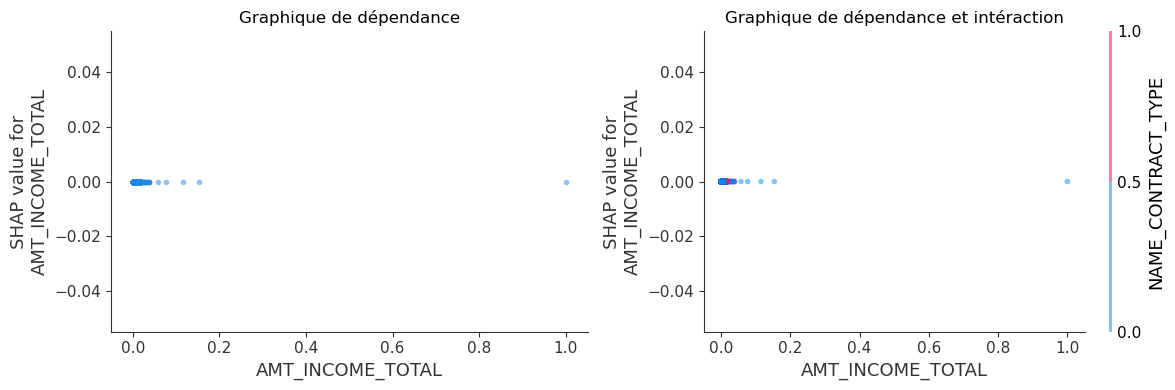

In [36]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("AMT_INCOME_TOTAL", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("AMT_INCOME_TOTAL", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

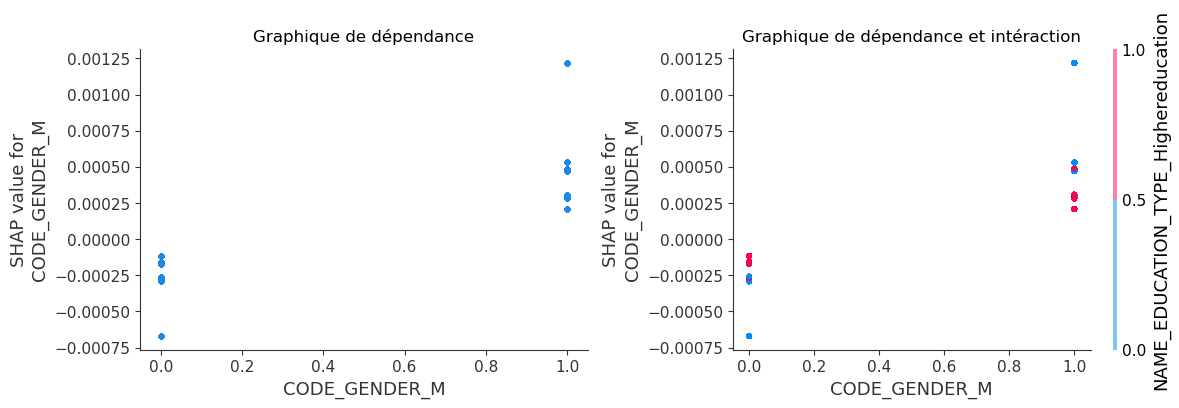

In [37]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("CODE_GENDER_M", shap_values[1], data_train_t, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("CODE_GENDER_M", shap_values[1], data_train_t, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

### PARTIE 2 - FEATURE IMPORTANCE LOCAL

In [38]:
shap_vals = explainer(data_train_t)

### Exemple client 0

### Graphiques de décision - Version 1

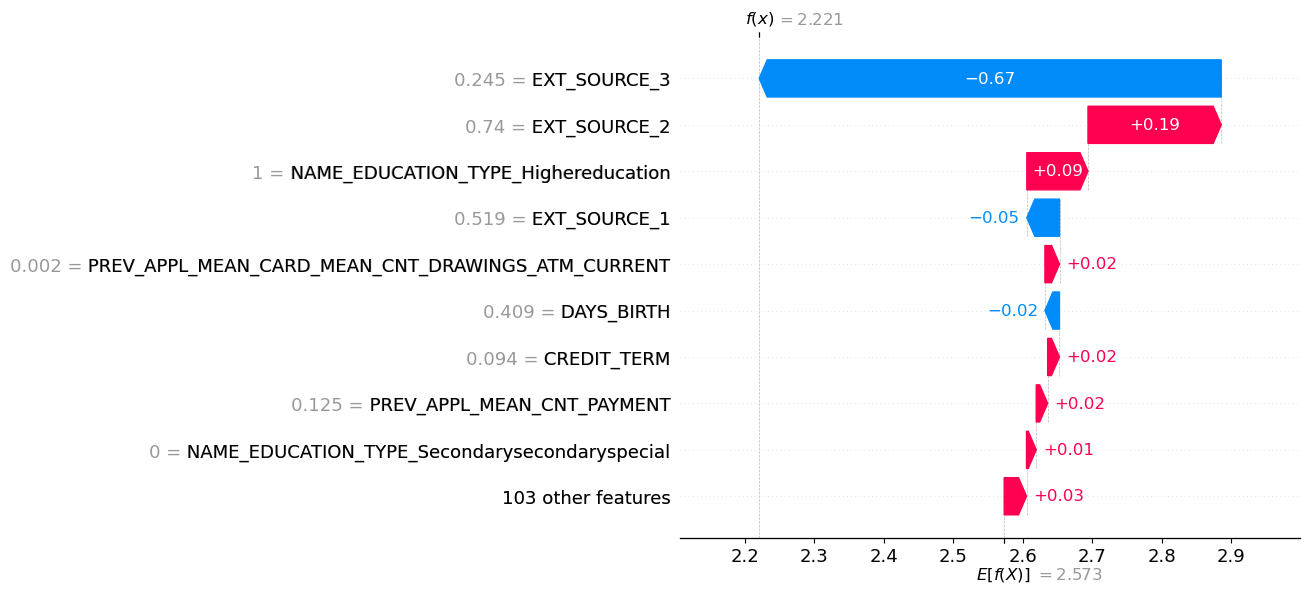

In [39]:
fig=shap.waterfall_plot(shap_vals[0][:, 0],show = False)

plt.show()

- Compléter décision attribution et feature importance locale
- Tranche INCOME pour meilleure visualisation
- dashboarding
- 

### Graphiques de décision - Version 2

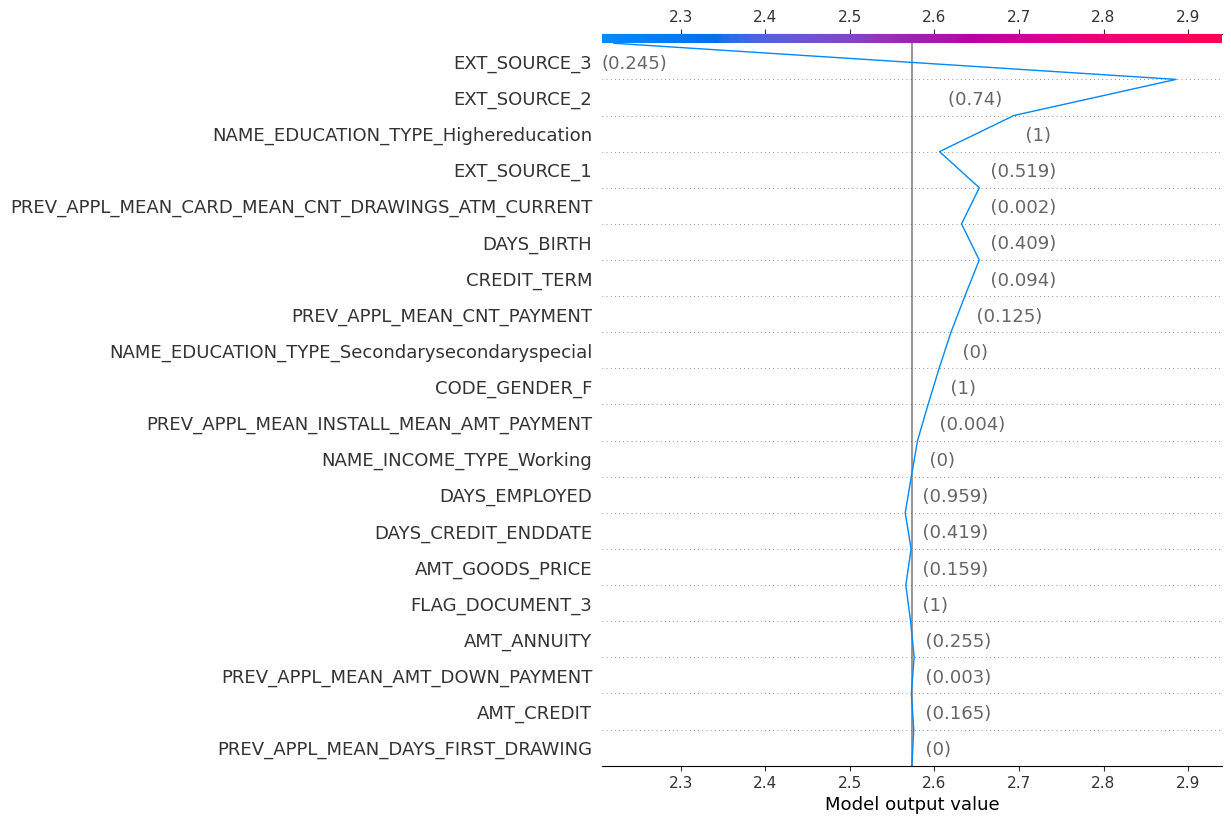

In [40]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][0,:], data_train_t.iloc[0,:])

### Exemple client 10

### Graphiques de décision - Version 1

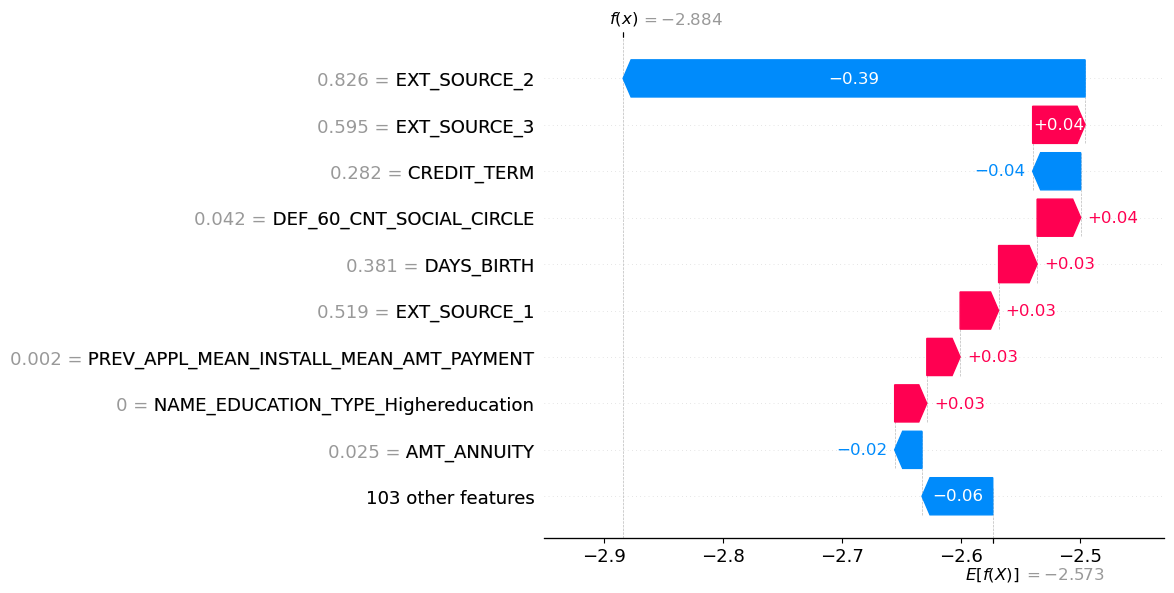

In [41]:
# shap local pour un client
shap.waterfall_plot(shap_vals[10][:, 1],show = False)
#plt.savefig('shap client 10 valid set tot', dpi = 200, bbox_inches = 'tight') 
plt.show()

### Graphiques de décision - Version 2

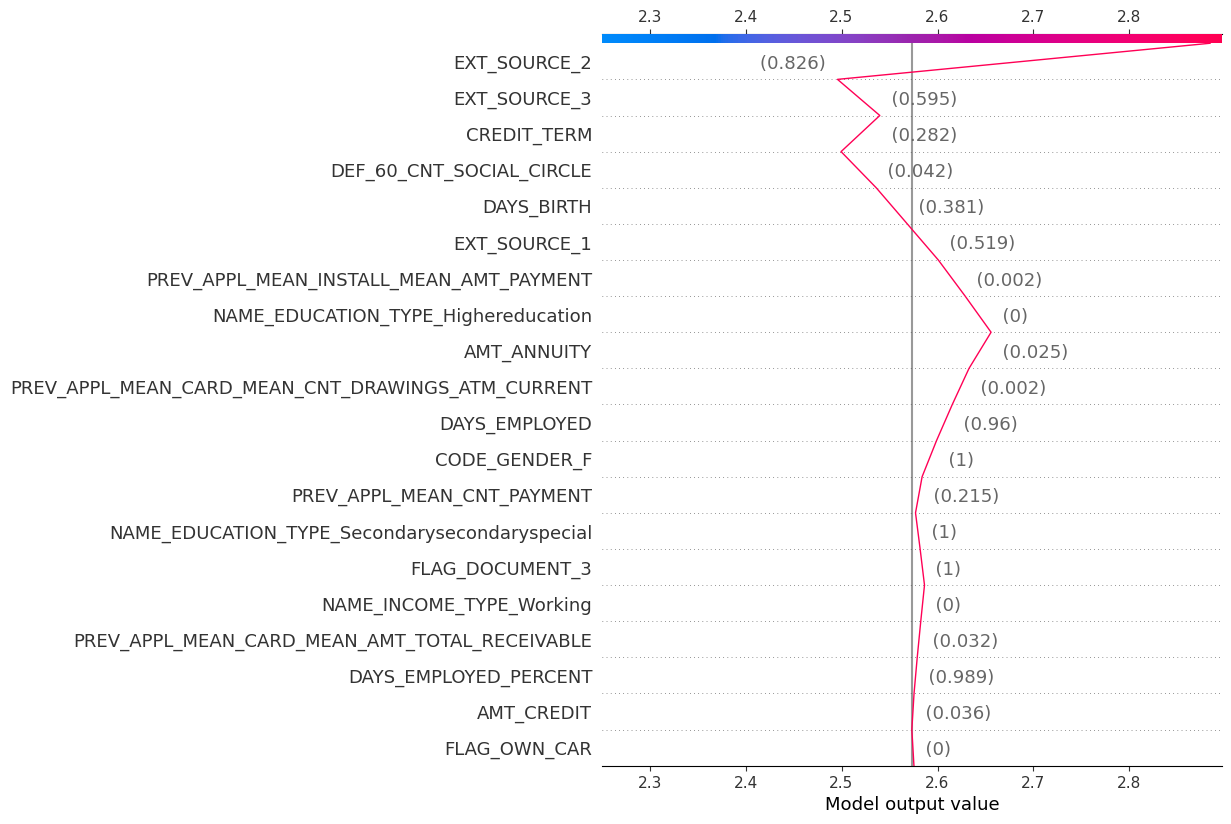

In [42]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][10,:], data_train_t.iloc[10,:])